In [1]:
# Function： DataSet boxes analyse
# Editor：ElodieShan
# Date:2020-05-01


In [2]:
import pickle
import numpy as np

#load info 
info_path = "/home/elodie/nuScenes_DATASET/pkl/infos_train_10sweeps_withvelo.pkl"
class_name = "car"

with open(info_path, "rb") as f:
    nusc_infos = pickle.load(f)


In [4]:
import matplotlib 
import matplotlib.pyplot as plt

#get data
classes = ['car', 'truck', 'construction_vehicle', 'bus', 'trailer']
num_bins = 100 
gt_boxes_list_all = []

for class_name in classes:
    gt_boxes_list = []
    for info in nusc_infos:
        mask = np.array([s == class_name for s in info["gt_names"]], dtype=np.bool_)
        gt_boxes_list.append(info["gt_boxes"][mask])
    gt_boxes_list = np.concatenate(gt_boxes_list, axis=0)
    gt_boxes_list_all.append(gt_boxes_list)


In [16]:
def get_hist_pic(data, num_bins, x_lable, class_name, data_type):
    hist,bins = np.histogram(data,num_bins) #return:频数，分箱的边界
    count = 0 
    for i in data:
        if i ==0:
            count = count +1
    print(count)
    print(hist)
    hist_max = max(hist)
    hist_max_index = hist.tolist().index(hist_max)

    x = [(bins[i+1]+bins[i])/2 for i in range(len(bins)-1)]    
    msg = "hist max: " + str(round(x[hist_max_index],4)) + "(" + str(hist_max) +")"+ " in [" + str(round(bins[hist_max_index],4)) + ":" + str(round(bins[hist_max_index+1],4)) + "]"

    plt.bar(x,hist,width=5/num_bins)
    plt.xlabel(x_lable)
    plt.ylabel('num')
    plt.ylim([0,hist_max + int(hist_max/5)])
    plt.title("[" + data_type + "] " + class_name + ": " +  x_lable + '\n' + msg)

    plt.savefig("./result/" + data_type + "_" + class_name + "_" +  x_lable + ".jpg")
    plt.show()
    plt.cla()


In [10]:
def get_lw_ratio_distribution(info, classes, data_type):#db info

    #start analyza
    num_bins = 100
    x_label = "length_width_ratio"
    for class_name in classes:
        gt_infos = info[class_name]
        gt_box_lw_ratio = [gt_info["box3d_lidar"][4]/gt_info["box3d_lidar"][3]
                                 for gt_info in gt_infos]
        get_hist_pic(gt_box_lw_ratio, num_bins, 'length_width-ratio', class_name, data_type)



In [8]:
# get_w_l_distribution(classes,gt_boxes_list_all)

In [1]:
# 查看box内点数与距离的关系
def get_distance_2d(x,y):
    return np.sqrt(np.sum([x**2,y**2]))

def get_points_num_distribution(info, classes, distances): # db info
    #start analyza
    num_bins = 10
    x_label = "point_num"
    num_points_max = 10
    for class_name in classes:
        gt_infos = info[class_name]
        num_points_in_gt = [int(gt_info['num_points_in_gt']) for gt_info in gt_infos]
        mask = np.array([num_points<num_points_max
                                 for num_points in num_points_in_gt], dtype=np.bool_)
        num_points_in_gt = np.array(num_points_in_gt)
        num_points_in_gt = num_points_in_gt[mask]
        gt_infos = np.array(gt_infos)[mask]
        gt_box_center_dis = [get_distance_2d(gt_info["box3d_lidar"][0],gt_info["box3d_lidar"][1]) 
                                 for gt_info in gt_infos]
        for i in range(len(distances)-1):           
            mask = np.array([dis>distances[i] and dis<distances[i+1] 
                                 for dis in gt_box_center_dis], dtype=np.bool_)
            num_points_in_range = num_points_in_gt[mask]
            x_label_new = x_label + " in [" + str(distances[i]) + "~" + str(distances[i+1])  + " ]  "
            get_hist_pic(num_points_in_range, num_bins, x_label_new, class_name)

In [3]:
import pickle
import numpy as np
from det3d.core import box_np_ops
import matplotlib 
import matplotlib.pyplot as plt
#load db info 
# db_info_path = "/home/elodie/nuScenes_DATASET/pkl/dbinfos_train_10sweeps_withoutvelo.pkl"
db_info_path = "/home/elodie/KITTI_DATASET/object/dbinfos_train.pkl"
data_type = "KITTI"
with open(db_info_path, "rb") as f:
    db_nusc_infos = pickle.load(f)

print(db_nusc_infos['Car'][0])

{'name': 'Car', 'path': 'gt_database/3_Car_0.bin', 'image_idx': 3, 'gt_idx': 0, 'box3d_lidar': array([13.51070263, -0.98177998, -0.9094899 ,  1.73000002,  4.1500001 ,
        1.57000005,  1.62      ]), 'num_points_in_gt': 674, 'difficulty': 0, 'group_id': 1}


[  0.  25.  50.  75. 100.]
0
[  32   15    0    0   71   36    0    6   11   65   11    8    3   48
  293   50  262   75  238  152  177  137  455  422  469 1048  469  686
  768  442  732  488  565  584  572  754  576  602  588  390  314  313
  245  322  138  262   21   41   44   62    4   22   57   21   36   32
    0   28    8    0   14   13    0   27    0    0    0    2    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0   31]


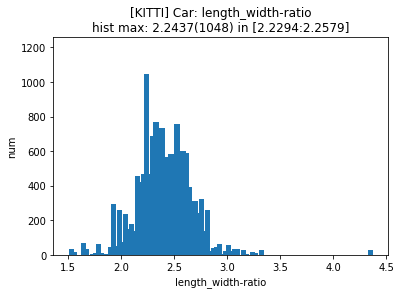

0
[ 25   0   0   0   0  27   0   0   0   0   0  10  36  31  67  20   0   0
   0   0   0   0   0   4   0  30   0  30   0   0 159   0  19   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  17]


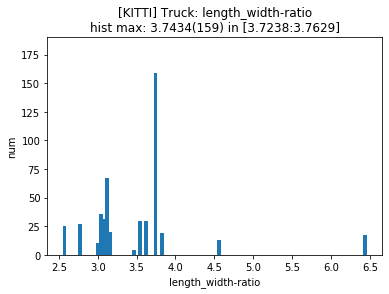

0
[ 8  0  0  0  0  0  0  0  0  0  0  0 27 14  0 11  0  0 40  8  0  0 22 20
 33 27 11  4 21 10 62 48  0  0 22 93  0 14 66  3 36  5  3 16 57 60 39  0
 27 52  0 33 12  0 36  0 38  0  0  0  0  0  1  0  0  1 34  0  0 29  0  0
  0  0  6 47  0  2 18  0 39  5  0 12 25  0  0  0  0  0  0  6  0  0  0  6
  0  0 54 34]


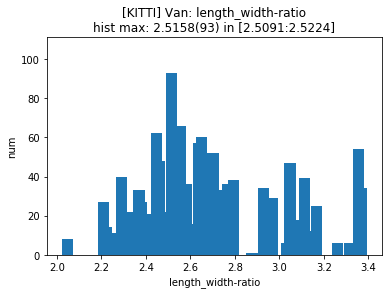

0
[19  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 21  0 18
  0 47  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0 28  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0 51]


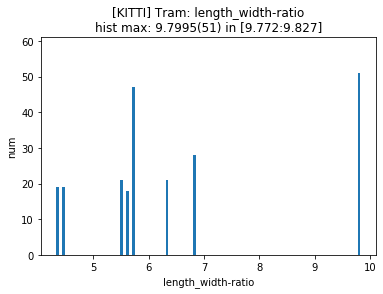

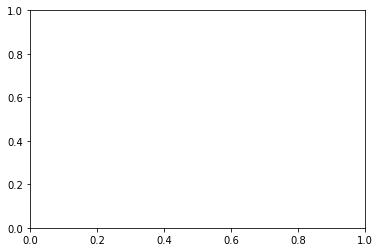

In [17]:
# classes = ['car', 'truck', 'bus', 'trailer','pedestrian','motorcycle', 'bicycle','traffic_cone']
data_type = "KITTI"
classes = ['Car', 'Truck', 'Van', 'Tram', 'Misc', 'Pedestrian', 'Person_sitting', 'Cyclist']
distances = np.linspace(0,100,5)
print(distances)

# get_points_num_distribution(db_nusc_infos,classes,distances)
get_lw_ratio_distribution(db_nusc_infos, classes, data_type)